ChEn-3170: Computational Methods in Chemical Engineering Fall 2020 UMass Lowell; Prof. V. F. de Almeida **27Oct20**

# 10. Universal Linear Solver
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents<a id="toc">
* [Introduction](#intro)
* [Any Linear System (Detailed Algorithm)](#any)
* [Universal Solver](#usolver)
---

## [Introduction](#toc)<a id="intro"></a>

Recall course notes OneNote [ChEn-3170-universal-lsolver](https://studentuml-my.sharepoint.com/:o:/g/personal/valmor_dealmeida_uml_edu/EiMhp_DKV8ZDvbXOjv2fmJ0BO9EY38Kvcds4xZjSKPlDwQ?e=wCO9vz) on computational stoichiometry including an introduction to the linear, rank-deficient, least-squares method.

Compute the solution vector $\xvec$ for a given matrix $\Amtrx$ and right-side vector $\bvec$:

\begin{equation*}
\Amtrx\,\xvec= \bvec .
\end{equation*}

When $\Amtrx$ is rank deficient, $\Amtrx^\top\Amtrx$ is also rank deficient (or singular). The normal equations 

\begin{equation*}
\boxed{\Amtrx^\top\Amtrx\,\xvec_\text{LS}  = \Amtrx^\top\,\bvec },
\end{equation*}

*either have an infinite number of solutions or have no solution*. 

Since $\Amtrx$ is rank deficient, a **unique** mininum-norm least squares solution, $\xvec_\text{MNLS}$, exists as follows,

\begin{equation*}
 \lim\limits_{\epsilon\rightarrow 0}\,\min\limits_\xvec \bigl( \norm{\bvec - \Amtrx\,\xvec_\text{MNLS}}^2 + \epsilon\norm{\xvec_\text{MNLS}}^2 \bigr) \quad\  \forall \quad\ \xvec.
\end{equation*}

This solution is obtained by solving:

\begin{equation*}
\boxed{
\lim\limits_{\epsilon\rightarrow 0}\,\bigl(\Amtrx^\top\Amtrx + \epsilon\Imtrx\bigr) \xvec_\text{MNLS}  = \Amtrx^\top\,\bvec },
\end{equation*}

where $\Amtrx^\top\Amtrx + \epsilon\Imtrx$ is square, symmetric and full rank. This augmented least-squares problem has a unique solution.

## [Any Linear System (Detailed Algorithm)](#toc)<a id="any"></a>
Refer to course Notebooks 08 and 09.

In [1]:
'''Any A matrix'''

import numpy as np

nrows = 20
ncols = 32

a = -120.2
b =  808.7

set_rank_deficient = True # set to True or False

a_mtrx = (b-a)*np.random.random((nrows,ncols)) + a

if set_rank_deficient:
    if nrows >= ncols:
        a_mtrx[:,-1] = 0.0
    if nrows < ncols:
        a_mtrx[-1,:] = 0.0
        
np.set_printoptions(precision=3, threshold=500, edgeitems=4, linewidth=100)
print('A =\n',a_mtrx)

A =
 [[ 324.423  248.238   66.556  589.338 ...  505.424   55.108    8.033  176.699]
 [-102.855  345.356  228.529  752.131 ...  248.173  392.185  349.946  208.298]
 [ 752.53   264.083  316.67   371.544 ...  644.778  301.861  171.747  642.575]
 [ 442.265  307.102   -4.554  264.994 ...  160.013  412.706  277.144   42.013]
 ...
 [ 342.039  510.194   66.754  416.732 ...    9.239  221.464  -32.307   23.096]
 [ 769.207  433.763  -31.071  609.869 ...  -14.483  667.48   576.923  401.163]
 [ 507.385  605.672  286.709  202.531 ...  759.505  289.105  740.692  -29.517]
 [   0.       0.       0.       0.    ...    0.       0.       0.       0.   ]]


In [2]:
'''Rank of A'''

try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own matrix_rank function here. Bailing out.'

a_rank = matrix_rank(a_mtrx)
print('S shape   = ',a_mtrx.shape)
print('Rank of S = ',a_rank)

if a_rank == min(a_mtrx.shape):
    print('Matrix is full rank.')
else:
    print('Matrix is rank deficient.')
    
assert a_rank == np.linalg.matrix_rank(a_mtrx)

S shape   =  (20, 32)
Rank of S =  19
Matrix is rank deficient.


In [3]:
'''Any right side vector'''

import numpy as np

a = -40.2
b =  3.7

b_vec = (b-a)*np.random.random(nrows) + a # production rates

np.set_printoptions(precision=3, threshold=100, edgeitems=3, linewidth=100)
print('b_vec =\n',b_vec)

b_vec =
 [-21.88   -5.166  -2.342   2.289  -7.111  -3.547   1.448 -39.976   3.531 -38.534 -28.654 -20.549
 -28.554  -4.089 -25.871 -17.452 -21.502 -20.344 -25.233 -34.241]


In [4]:
'''Compute the MNLS solution'''

import numpy as np

try:    
    from chen_3170.toolkit import solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

# build and solve A x = b MNLS problem

epsilon_values = np.logspace(+2,-6,10)

np.set_printoptions(precision=3, threshold=100, edgeitems=3, linewidth=100)

x_norm_history = list()
    
for epsilon in epsilon_values:
    
    print('')
    print('epsilon = %1.1e'%epsilon)
    print('')

    mtrx = a_mtrx.transpose() @ a_mtrx + epsilon * np.eye(a_mtrx.shape[1]) # AT A + epsilon I, AT A is the normal matrix
    vec  = a_mtrx.transpose() @ b_vec                            # AT b

    # Solve (ATA + epsilon I) x = AT b
    x_vec = solve(mtrx, vec, pivot_tol=1e-6, zero_tol=1e-8) # matrix is full rank; partial pivoting works
    #x_vec = np.linalg.solve(mtrx, vec)
    #print('')
    #print('x_vec=\n',x_vec)
    #print('')
        
    x_norm = np.linalg.norm(x_vec)
    print('||x|| = %8.5e'%x_norm)
    
    x_norm_history.append( x_norm ) # save for plotting
    
    # test my solution against NumPy solve
    print('max(abs(x_vec-x_vec_numpy)) = %2.2e'%np.max(np.abs((x_vec - np.linalg.solve(mtrx, vec)))))
    
    print('')
    residual_vec = b_vec - a_mtrx @ x_vec
    print('||b - A x||^2 + eps*||x||^2 = %8.5e'%(np.linalg.norm(residual_vec)**2 + epsilon*x_norm**2))
    print('||b - A x|| +       ||x||   = %8.5e'%(np.linalg.norm(residual_vec) + x_norm))
    print('||b - A x||                 = %8.5e'%(np.linalg.norm(residual_vec)))


epsilon = 1.0e+02

||x|| = 4.98577e-02
max(abs(x_vec-x_vec_numpy)) = 2.14e-13

||b - A x||^2 + eps*||x||^2 = 1.17271e+03
||b - A x|| +       ||x||   = 3.42910e+01
||b - A x||                 = 3.42412e+01

epsilon = 1.3e+01

||x|| = 4.98687e-02
max(abs(x_vec-x_vec_numpy)) = 2.15e-12

||b - A x||^2 + eps*||x||^2 = 1.17249e+03
||b - A x|| +       ||x||   = 3.42910e+01
||b - A x||                 = 3.42412e+01

epsilon = 1.7e+00

||x|| = 4.98701e-02
max(abs(x_vec-x_vec_numpy)) = 1.21e-11

||b - A x||^2 + eps*||x||^2 = 1.17246e+03
||b - A x|| +       ||x||   = 3.42910e+01
||b - A x||                 = 3.42412e+01

epsilon = 2.2e-01

||x|| = 4.98703e-02
max(abs(x_vec-x_vec_numpy)) = 1.12e-10

||b - A x||^2 + eps*||x||^2 = 1.17246e+03
||b - A x|| +       ||x||   = 3.42910e+01
||b - A x||                 = 3.42412e+01

epsilon = 2.8e-02

||x|| = 4.98703e-02
max(abs(x_vec-x_vec_numpy)) = 6.05e-10

||b - A x||^2 + eps*||x||^2 = 1.17246e+03
||b - A x|| +       ||x||   = 3.42910e+01
||b - A x|| 

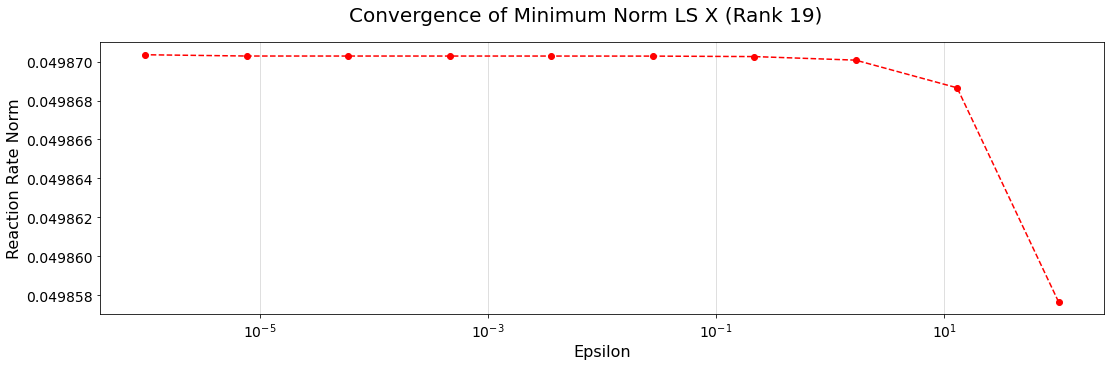

In [5]:
'''Plot Convergence of the Shortest Least-Square Solution Vector'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
%matplotlib inline

fig, ax = plt.subplots(figsize=(18,5))
ax.semilogx(epsilon_values, x_norm_history,'ro--')
ax.set_ylabel('Reaction Rate Norm',fontsize=16)
ax.set_xlabel('Epsilon',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.suptitle('Convergence of Minimum Norm LS X (Rank %s)'%str(a_rank),fontsize=20)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
plt.show()

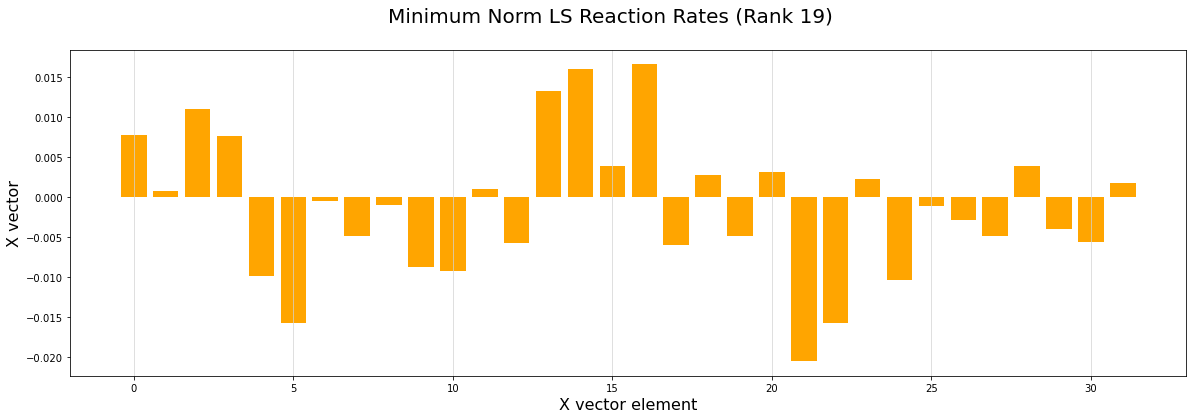

In [6]:
'''Minimum norm least-squares reaction rates'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(x_vec.size), x_vec, color='orange')

ax.set_ylabel('X vector',fontsize=16)
ax.set_xlabel('X vector element',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Minimum Norm LS Reaction Rates (Rank %s)'%str(a_rank),fontsize=20)
plt.show()

## [Universal Solver](#toc)<a id="usolver"></a>

Compute the solution vector $\xvec$, given $\Amtrx$ and $\bvec$:

\begin{equation*}
\Amtrx\,\xvec= \bvec .
\end{equation*}

In [7]:
'''Any A matrix'''

import numpy as np

nrows = 20
ncols = 32

a = -120.2
b =  808.7

set_rank_deficient = True # set to True or False

a_mtrx = (b-a)*np.random.random((nrows,ncols)) + a

if set_rank_deficient:
    if nrows >= ncols:
        a_mtrx[:,-1] = 0.0
    if nrows < ncols:
        a_mtrx[-1,:] = 0.0
        
np.set_printoptions(precision=3, threshold=100, edgeitems=4, linewidth=100)
print('A =\n',a_mtrx)

A =
 [[ 7.166e+02  3.158e+02  7.876e+02  7.575e+02 ...  3.896e+02  4.145e+02  1.898e+02  1.748e+02]
 [ 5.533e+02  1.426e+02  6.079e+02  7.039e+02 ...  6.939e+02  6.694e+02  6.517e+01 -4.238e+00]
 [ 2.130e+02  1.730e+02  8.009e+02  6.855e+02 ...  3.625e+02  2.794e+02  1.955e+02  7.900e+02]
 [ 6.334e+02  2.560e+02  1.349e+02 -8.888e+01 ...  9.079e+01  4.705e-01  9.650e+01  5.911e+02]
 ...
 [ 6.034e+02  1.310e+02  7.231e+02  1.161e+02 ...  7.385e+02  4.902e+02  5.469e+01  7.811e+02]
 [ 5.261e+01  7.549e+02  2.273e+02  3.486e+02 ...  7.905e+02  7.777e+01  5.848e+02  1.778e+02]
 [-4.419e+01  6.647e+02  4.929e+02 -4.335e+01 ...  4.767e+02  1.439e+02 -1.063e+02  6.739e+02]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00  0.000e+00  0.000e+00]]


In [8]:
'''Rank of A'''

try:    
    from chen_3170.toolkit import matrix_rank   
except ModuleNotFoundError:
    assert False, 'You need to provide your own matrix_rank function here. Bailing out.'

a_rank = matrix_rank(a_mtrx)
print('S shape   = ',a_mtrx.shape)
print('Rank of S = ',a_rank)

if a_rank == min(a_mtrx.shape):
    print('Matrix is full rank.')
else:
    print('Matrix is rank deficient.')
    
assert a_rank == np.linalg.matrix_rank(a_mtrx)

S shape   =  (20, 32)
Rank of S =  19
Matrix is rank deficient.


In [9]:
'''Any right side vector'''

import numpy as np

a = -40.2
b =  3.7

b_vec = (b-a)*np.random.random(nrows) + a # production rates

np.set_printoptions(precision=3, threshold=100, edgeitems=3, linewidth=100)
print('b_vec =\n',b_vec)

b_vec =
 [  2.092  -4.907 -26.356  -0.143 -21.496 -34.948 -25.06  -26.949 -15.288  -8.194 -13.34    3.586
 -37.601 -23.478 -10.981 -36.548  -3.641 -38.133 -29.086 -18.072]


In [10]:
import numpy as np

try:    
    from chen_3170.toolkit import universal_solve   
except ModuleNotFoundError:
    assert False, 'You need to provide your own lu_factorization function here. Bailing out.'

x_vec = universal_solve(a_mtrx, b_vec, pivot_tol=1e-6, zero_tol=1e-8)

print('max(abs(b - Ax)) = %3.3e'%np.max(np.abs(b_vec-a_mtrx@x_vec)))

max(abs(b - Ax)) = 1.807e+01


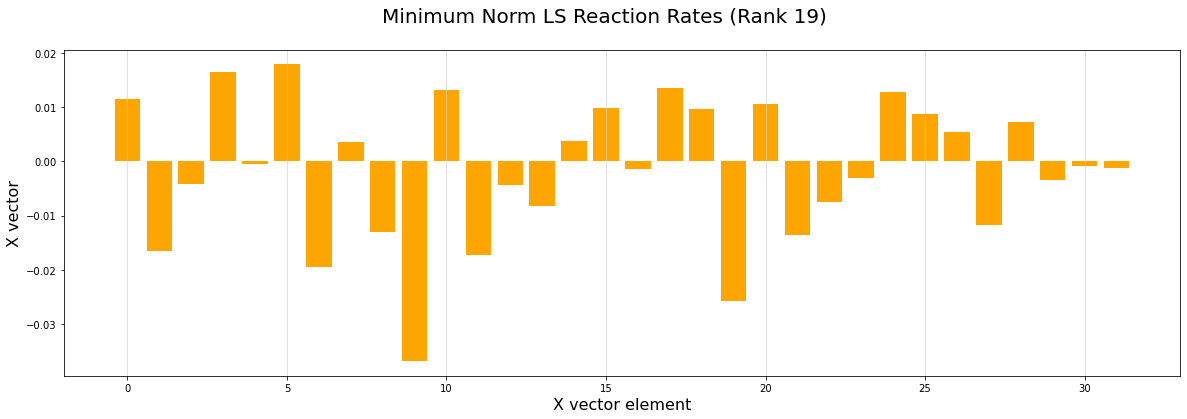

In [11]:
'''Minimum norm least-squares reaction rates'''

from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(range(x_vec.size), x_vec, color='orange')

ax.set_ylabel('X vector',fontsize=16)
ax.set_xlabel('X vector element',fontsize=16)
ax.xaxis.grid(True,linestyle='-',which='major',color='lightgrey',alpha=0.9)
fig.suptitle('Minimum Norm LS Reaction Rates (Rank %s)'%str(a_rank),fontsize=20)
plt.show()